In [1]:
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import scipy.stats as stats
pd.plotting.register_matplotlib_converters()
from sklearn import svm

In [2]:
df=pd.read_csv('Placement_Data_Full_Class_1.csv')

In [3]:
df.head()

,Unnamed: 0,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
#group by gender according to mba_p

In [5]:
gender_df=df.groupby('gender')

In [6]:
Female_ds=gender_df.etest_p.groups['F']
Male_ds=gender_df.etest_p.groups['M']

In [7]:
Female_ds.shape

(76,)

In [8]:
Male_ds.shape

(139,)

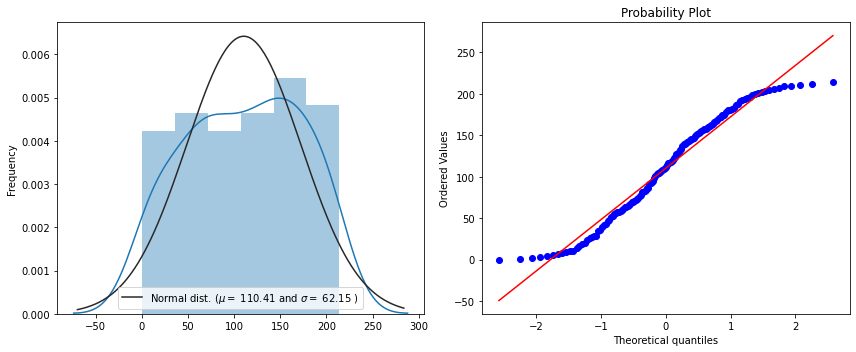

(0.9570540189743042, 0.00024541604216210544)


In [9]:
#fig,axes=plt.subplots(1,2,figsize=(15,5),sharey=True)
plt.subplots(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
sns.distplot(Male_ds,fit=stats.norm,ax=ax1)
# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(Male_ds)

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

#fig = plt.figure()
ax1 = plt.subplot(1,2,2)
stats.probplot(Male_ds, plot=plt)
plt.tight_layout()
plt.savefig('fig12.png')
plt.show()
print(stats.shapiro(Male_ds))#data is not normally distributed)

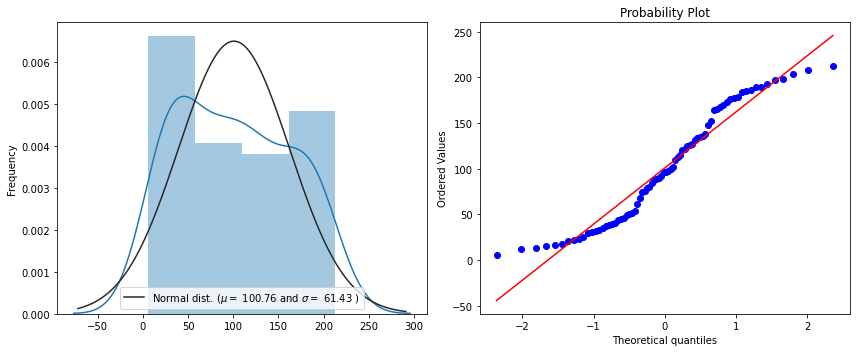

(0.9368832111358643, 0.0009311971953138709)


In [11]:
plt.subplots(figsize=(12,5))
ax1 = plt.subplot(1,2,1)

#plt.subplots(figsize=(8,5))
sns.distplot(Female_ds,fit=stats.norm,ax=ax1)
# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(Female_ds)

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

#fig = plt.figure()
ax2 = plt.subplot(1,2,2)
stats.probplot(Female_ds, plot=plt)
plt.tight_layout()
plt.savefig('fig13.png')
plt.show()
print(stats.shapiro(Female_ds))

In [12]:
stats.levene(Male_ds,Female_ds)

LeveneResult(statistic=0.00539627291655425, pvalue=0.9415095453995393)

In [17]:
# WELCH’S T-TEST ASSUMPTIONS (independent T-Test with unequal variance)
def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2,equal_var=True)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions-Gender doesnot affect Salaries (fail to reject H0)')
    else:
        print('Different distributions-Gender affect Salaries (reject H0)')
    

In [10]:
sample_size = 60
female_sampled = np.random.normal(Female_ds, sample_size)
male_sampled = np.random.normal(Male_ds, sample_size)



(0.9889926314353943, 0.340273916721344)
(0.9878270030021667, 0.6859137415885925)


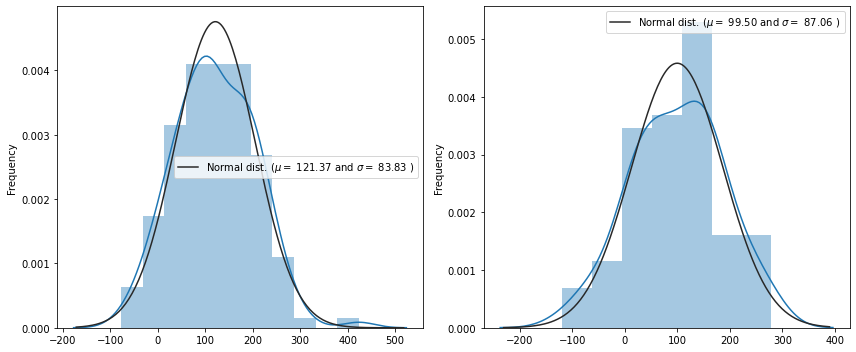

In [11]:
plt.subplots(figsize=(12,5))
ax1 = plt.subplot(1,2,1)

#plt.subplots(figsize=(8,5))
sns.distplot(male_sampled,fit=stats.norm,ax=ax1)
# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(male_sampled)

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.tight_layout()
ax2 = plt.subplot(1,2,2)
#plt.subplots(figsize=(8,5))
sns.distplot(female_sampled,fit=stats.norm,ax=ax2)
# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(female_sampled)
# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.tight_layout()
#plt.savefig('fig14.jpg')
print(stats.shapiro(male_sampled))
print(stats.shapiro(female_sampled))


In [12]:
stats.levene(male_sampled,female_sampled)

LeveneResult(statistic=0.34111242381513607, pvalue=0.5598058281460193)

In [18]:
compare_2_groups(male_sampled, female_sampled, 0.05, sample_size)

Statistics=1.796, p=0.074
Same distributions-Gender doesnot affect Salaries (fail to reject H0)


In [20]:
np.var(male_sampled)

7028.27444998971

In [15]:
#degree of freedom calculated due to unequal variance
df_num = (male_sampled.var()/male_sampled.shape[0] + female_sampled.var()/female_sampled.shape[0])**2
df_dem = (
    (male_sampled.var()/male_sampled.shape[0])**2/(male_sampled.shape[0]-1)) + \
    (female_sampled.var()/female_sampled.shape[0])**2/(female_sampled.shape[0]-1)
df = df_num/df_dem

In [16]:
df

149.44347833555227